# Exploratory Data Analysis

## Installing and importing libraries

In [ ]:
pip install numpy pandas matplotlib seaborn

In [362]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [369]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv("/Users/sig/Downloads/customer-data.csv")

In [370]:
#Return the number of rows and columns of the dataframe
df.shape

(10000, 19)

In [371]:
#Return first 5 rows of the dataframe
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [372]:
#Return info on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

## Data Preparation

In [373]:
#Display number missing values per column
df.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [374]:
#Check the mean credit score for each income group
df.groupby(by="income")["credit_score"].mean()


income
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: credit_score, dtype: float64

In [375]:
#Create a function to impute missing values based on mean credit score for each income group
def impute_creditscore(income_classes):
    """This function takes a list of income groups and imputes the missing values of each 
        based on the mean credit score for each group"""
    #iterate through each income group
    for income_class in income_classes:      
        
        #create a subset of dataframe to use as filter
        mask = df["income"] == income_class
        
        #calculate the mean for the income group
        mean = df[df["income"] == income_class]["credit_score"].mean()
        
        #fill the missing values with mean of credit score for group
        df.loc[mask,"credit_score"] = df.loc[mask,'credit_score'].fillna(mean)

In [379]:
#Apply the function to the dataframe
income_groups = ["poverty","upper class","middle class","working class"]
impute_creditscore(income_groups)

In [383]:
#Check the mean annual mileage for the different driving experience groups
df.groupby(by="driving_experience")["annual_mileage"].mean()

driving_experience
0-9y      12249.131670
10-19y    11791.275168
20-29y    11144.181256
30y+      10694.968553
Name: annual_mileage, dtype: float64

In [385]:
#Calculate mean for annual_mileage column
mean_mileage = df["annual_mileage"].mean()

#Fill in null values using the column mean
df["annual_mileage"].fillna(mileage_mean,inplace=True)

#Check for null values
df.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [158]:
#Delete the id and postal_code columns
df.drop(["id","postal_code"],axis=1,inplace=True)

In [159]:
df.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,12000.0,sedan,0,0,0,False
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,16000.0,sedan,0,0,0,True
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,11000.0,sedan,0,0,0,False
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,11000.0,sedan,0,0,0,False
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,12000.0,sedan,2,0,1,True


## Analyzing the Data

### Univariate Analysis

### Categorical Unordered

In [162]:
#Check the count for each category in the "gender" column
df["gender"].value_counts()

female    5010
male      4990
Name: gender, dtype: int64

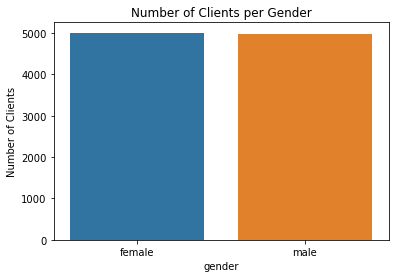

In [361]:
#Create a countplot to visualize the count of each category in the gender column.
sns.countplot(data=df,x="gender")
plt.title("Number of Clients per Gender")
plt.ylabel("Number of Clients")
plt.show()

### Categorical ordered

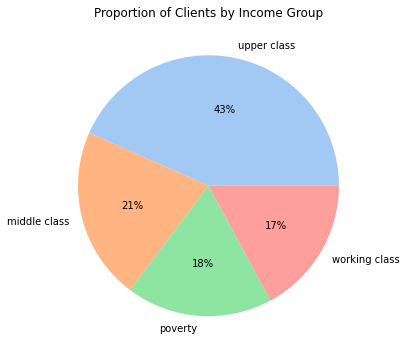

In [386]:
#Define plot size
plt.figure(figsize=[6,6])

#Define column to use
data = df["income"].value_counts(normalize=True)

#Define labels
labels = ["upper class","middle class","poverty","working class"]

#Define color palette
colors = sns.color_palette('pastel')

#Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Clients by Income Group")
plt.show()

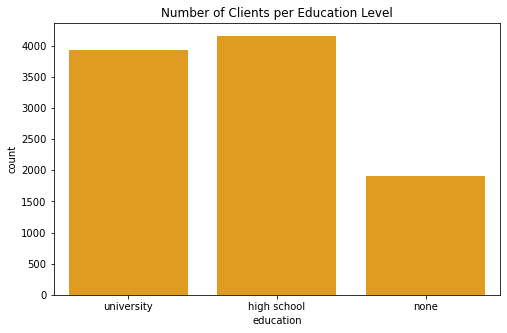

In [387]:
#Create a countplot to visualize the count of each category in the education column 
plt.figure(figsize=[8,5])
sns.countplot(data=df,x="education",order=["university","high school","none"],color="orange")
plt.title("Number of Clients per Education Level")
plt.show()

## Numerical Univariate

In [193]:
#Return summary statistics for the "credit_score" column
df["credit_score"].describe()

count    10000.000000
mean         0.515247
std          0.134628
min          0.053358
25%          0.421301
50%          0.523659
75%          0.613827
max          0.960819
Name: credit_score, dtype: float64

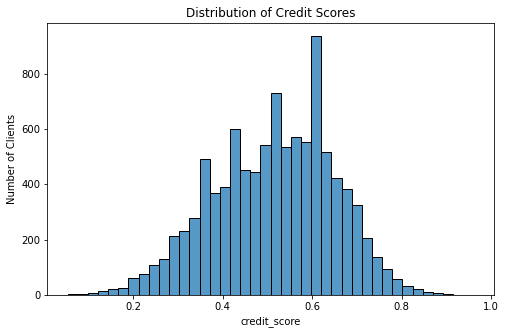

In [388]:
#Plot a histogram using the "credit_score" column
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="credit_score",bins=40).set(title="Distribution of Credit Scores",ylabel="Number of Clients")
plt.show()

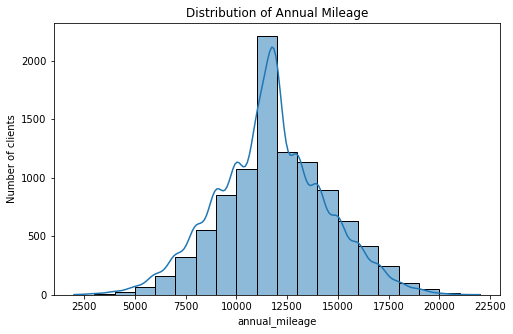

In [356]:
#Plot a histogram using the "annual_mileage" column
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="annual_mileage",bins=20,kde=True).set(title="Distribution of Annual Mileage",ylabel="Number of clients")
plt.show()

## Bivariate Analysis

### Numerical-Numerical

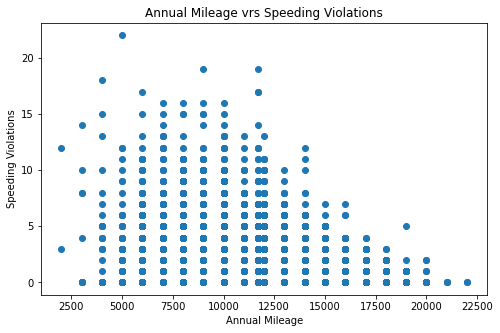

In [296]:
#Create a scatter plot to. show relationship. between "annual_mileage" and "speeding_violations"
plt.figure(figsize=[8,5])
plt.scatter(data=df,x="annual_mileage",y="speeding_violations")
plt.title("Annual Mileage vrs Speeding Violations")
plt.ylabel("Speeding Violations")
plt.xlabel("Annual Mileage")
plt.show()

In [200]:
#Create a correlation matrix to show relationship between select variables
corr_matrix = df[["speeding_violations","DUIs","past_accidents"]].corr()
corr_matrix

,speeding_violations,DUIs,past_accidents
speeding_violations,1.000000,0.359838,0.443074
DUIs,0.359838,1.000000,0.259359
past_accidents,0.443074,0.259359,1.000000


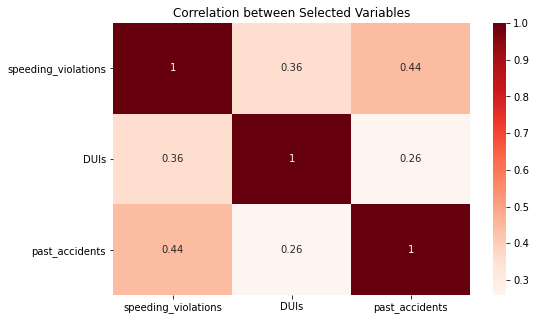

In [288]:
#Create a heatmap to visualize correlation
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix,annot=True,cmap='Reds')
plt.title("Correlation between Selected Variables")
plt.show()

### Numerical-Categorical

In [394]:
#Check the mean annual mileage per category in the outcome column
df.groupby('outcome')['annual_mileage'].mean()

outcome
False    11375.549735
True     12401.574221
Name: annual_mileage, dtype: float64

In [214]:
df.groupby('outcome')['annual_mileage'].median()

outcome
False    11697.003207
True     12000.000000
Name: annual_mileage, dtype: float64

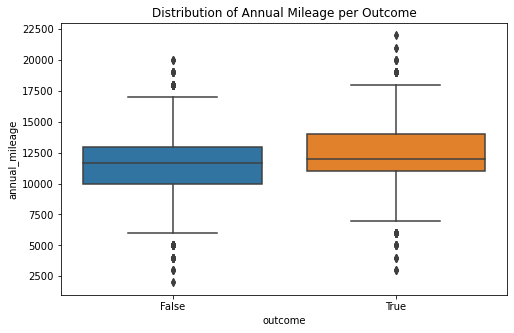

In [395]:
#Plot two boxplots to compare dispersion
plt.figure(figsize=[8,5])
sns.boxplot(data=df,x='outcome', y='annual_mileage')
plt.title("Distribution of Annual Mileage per Outcome")
plt.show()

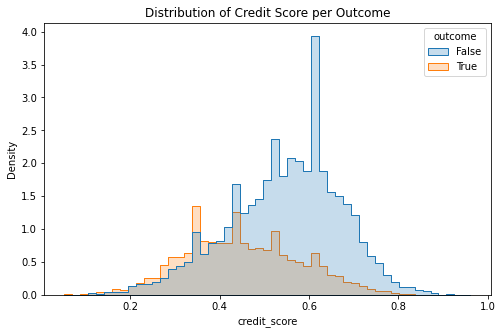

In [396]:
#Create histograms to compare distribution 
plt.figure(figsize=[8,5])
sns.histplot(df,x="credit_score",hue="outcome",element="step",stat="density")
plt.title("Distribution of Credit Score per Outcome")
plt.show()

### Categorical-Categorical

In [397]:
#Create a new "claim rate" column
df['claim_rate'] = np.where(df['outcome']==True,1,0)
df['claim_rate'].value_counts()

0    6867
1    3133
Name: claim_rate, dtype: int64

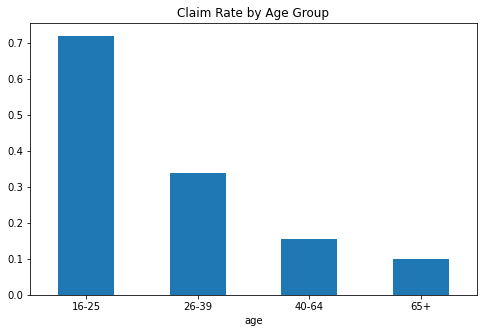

In [404]:
#Plot the average claim rate per age group
plt.figure(figsize=[8,5])
df.groupby('age')['claim_rate'].mean().plot(kind="bar")
plt.title("Claim Rate by Age Group")
plt.xticks(rotation=0)
plt.show()

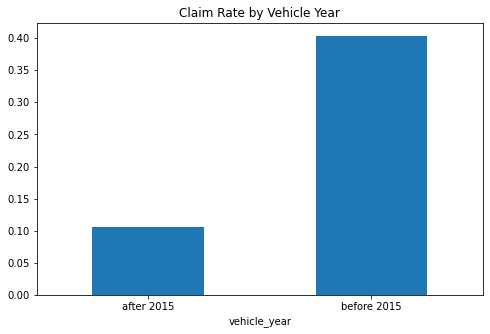

In [403]:
#Plot the average claim rate per vehicle year category
plt.figure(figsize=[8,5])
df.groupby('vehicle_year')['claim_rate'].mean().plot(kind="bar")
plt.title("Claim Rate by Vehicle Year")
plt.xticks(rotation=0)
plt.show()

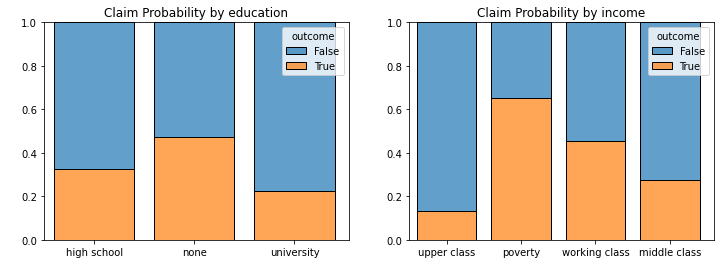

In [360]:
#Create an empty figure object
fig, axes = plt.subplots(1,2,figsize=(12,4))

#Plot two probability graphs for education and income
for i,col in enumerate(["education","income"]):
    sns.histplot(df, ax=axes[i],x=col, hue="outcome",stat="probability", multiple="fill", shrink=.8,alpha=0.7)
    axes[i].set(title="Claim Probability by "+ col,ylabel=" ",xlabel=" ")

## Multivariate Analysis

In [408]:
#Create a pivot table for education and income with average claim rate as values
edu_income = pd.pivot_table(data=df,index='education',columns='income',values='claim_rate',aggfunc='mean')
edu_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


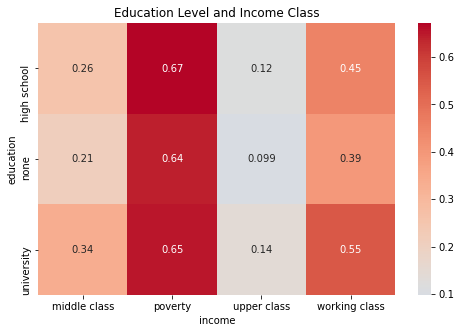

In [409]:
#Create a heatmap to visualize income, education and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(edu_income,annot=True,cmap='coolwarm',center=0.117)
plt.title("Education Level and Income Class")
plt.show()

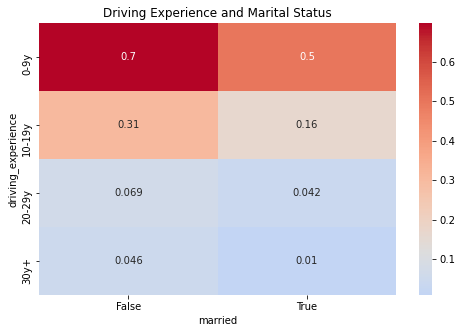

In [410]:
#Create pivot table for driving experience and marital status with average claim rate as values
driv_married = pd.pivot_table(data=df,index='driving_experience',columns='married',values='claim_rate')

#Create a heatmap to visualize driving experience, marital status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(driv_married,annot=True,cmap='coolwarm', center=0.117)
plt.title("Driving Experience and Marital Status")
plt.show()

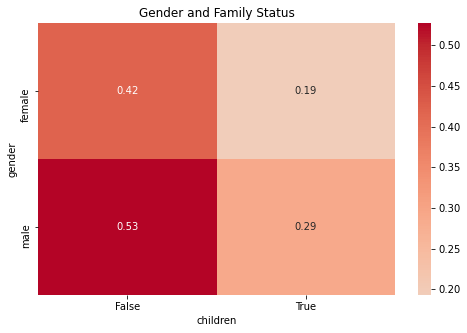

In [411]:
#Create pivot table for gender and family status with average claim rate as values
gender_children = pd.pivot_table(data=df,index='gender',columns='children',values='claim_rate')

#Create a heatmap to visualize gender, family status and claim rate
plt.figure(figsize=[8,5])
sns.heatmap(gender_children,annot=True,cmap='coolwarm', center=0.117)
plt.title("Gender and Family Status")
plt.show()
